Looking for variability in LM Com, maybe learning specutils at the same time.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
spectra = glob.glob('*.dat')

In [3]:
spectra

['lm_com_COS_FUV_1291_2017-12-17.dat', 'lm_com_COS_FUV_1291_2015-03-08.dat']

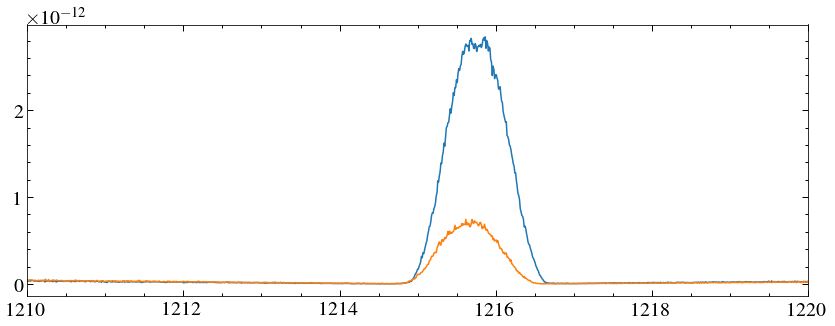

In [7]:
for s in spectra:
    w, f, e, dq = np.loadtxt(s, unpack=True)
    plt.plot(w, f)
    plt.xlim(1210, 1220)

In [10]:
def boxcar(flux,factor):
    smoothed_flux=convolve(flux,Box1DKernel(factor))
    return smoothed_flux

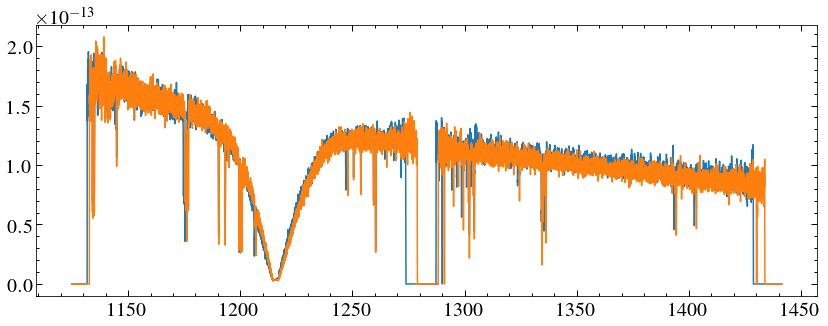

In [13]:
 for s in spectra:
    w, f, e, dq = np.loadtxt(s, unpack=True)
    ly_mask = (w < 1214.5)|(w > 1217.)
    f = boxcar(f,5)
    plt.plot(w[ly_mask], f[ly_mask])

Ok, lots of lines, clear doppler shift. Let's zoom in on the usual suspects...

(1280, 1310)

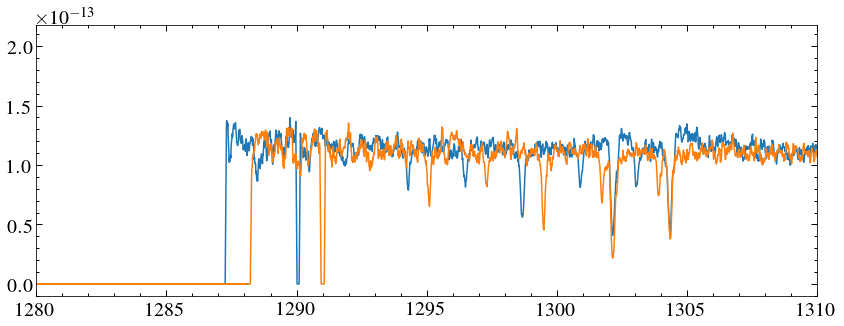

In [18]:
 for s in spectra:
    w, f, e, dq = np.loadtxt(s, unpack=True)
    ly_mask = (dq==0)&(w < 1214.5)|(w > 1217.)
    f = boxcar(f,5)
    plt.plot(w[ly_mask], f[ly_mask])
plt.xlim(1280, 1310)

By eye there are maybe small differences in line strength? Let's see how that holds up to measuring the equivalent widths.

In [20]:
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty

In [81]:
w1, f1, e1, dq1 = np.loadtxt(spectra[0], unpack=True)
ly_mask = (dq1==0)& (w1 > 1133) &(w1< 1214.5)|(w1 > 1217.) &  (w1<1425)
w1, f1, e1 = w1[ly_mask], f1[ly_mask], e1[ly_mask]
spec1 = Spectrum1D(spectral_axis=w1*u.AA, flux=f1* u.Unit('erg cm-2 s-1 AA-1'), uncertainty=StdDevUncertainty(e1* u.Unit('erg cm-2 s-1 AA-1')))

w2, f2, e2, dq2 = np.loadtxt(spectra[0], unpack=True)
ly_mask = (dq2==0)&(w2< 1214.5)|(w2 > 1217.)
w2, f2, e2 = w2[ly_mask], f2[ly_mask], e2[ly_mask]
spec2 = Spectrum1D(spectral_axis=w2*u.AA, flux=f2* u.Unit('erg cm-2 s-1 AA-1'), uncertainty=StdDevUncertainty(e2* u.Unit('erg cm-2 s-1 AA-1')))

In [88]:
#continuum fit
from specutils.fitting import fit_generic_continuum
cft1 = fit_generic_continuum(spec1)(spec1.spectral_axis)

In [89]:
nspec1 = spec1/cft1

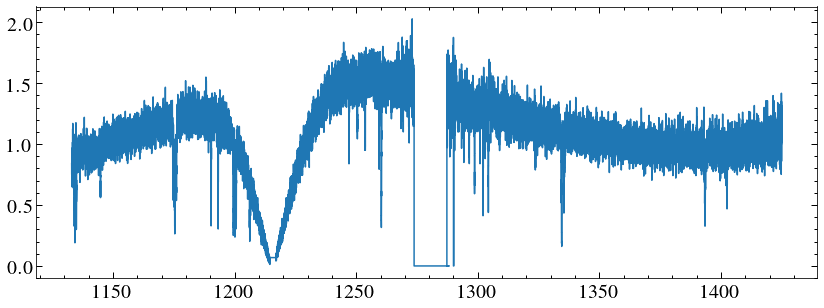

In [84]:
plt.step(nspec1.wavelength, nspec1.flux)


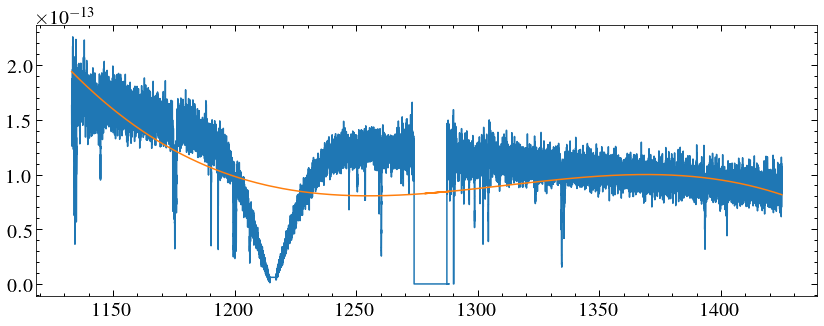

In [85]:
plt.step(spec1.wavelength, spec1.flux)
plt.plot(spec1.wavelength, cft1)

Ok looks like this is best done on a regional basis. Fine with me.

In [90]:
mask = (w1 >1290)
spec11 = Spectrum1D(spectral_axis=w1[mask]*u.AA, flux=f1[mask]* u.Unit('erg cm-2 s-1 AA-1'), uncertainty=StdDevUncertainty(e1[mask]* u.Unit('erg cm-2 s-1 AA-1')))

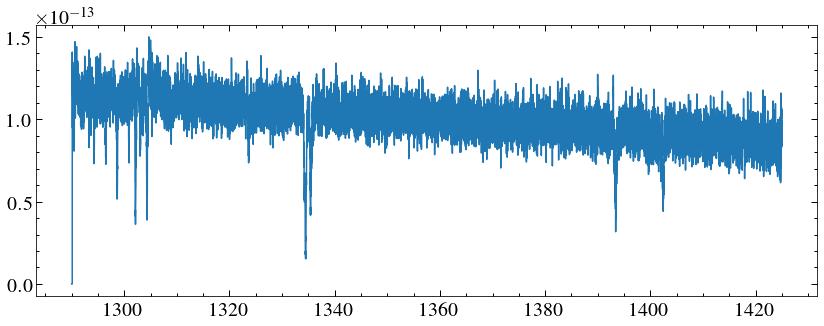

In [91]:
plt.step(spec11.wavelength, spec11.flux)

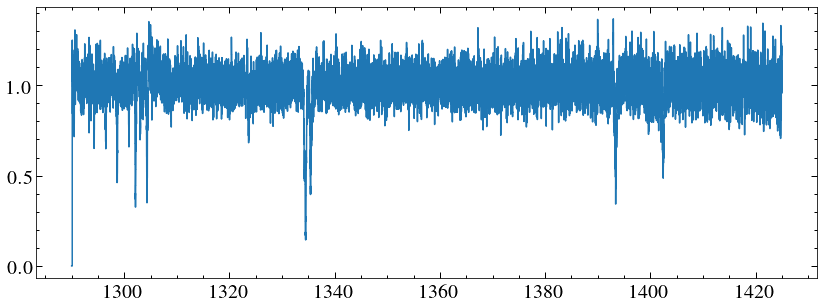

In [92]:
cft11 = fit_generic_continuum(spec11)(spec11.spectral_axis)
nspec11 = spec11/cft11
plt.step(nspec11.wavelength, nspec11.flux)

In [105]:
ism = Table.read('../ism_lines.csv')

(1285, 1430)

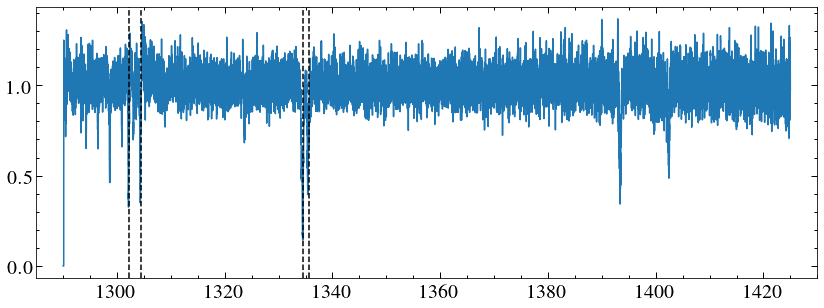

In [107]:
plt.step(nspec11.wavelength, nspec11.flux)
[plt.axvline(line,ls='--', c='k') for line in ism['rest_lambda']]
plt.xlim(1285, 1430)